/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Starting the Enhanced Approach 4 implementation...
Enhanced Approach 4: Using ALL non-IPO entries for training

Loading and preparing dataset...
Dataset shape: (295, 175)
Number of unique companies: 110

VC Round column analysis:
Unique values: ['3rd Round' nan 'Angel' '1st Round' '2nd Round' '6th Round' '4th Round'
 '5th Round' '8th Round' '7th Round' '9th Round' '11th Round']

Value counts:
VC Round
NaN           171
5th Round      21
2nd Round      20
6th Round      18
4th Round      17
1st Round      13
3rd Round      12
7th Round       9
Angel           6
8th Round       5
9th Round       2
11th Round      1
Name: count, dtype: int64
Target variable: Post Valuation

1. Preparing data for machine learning...
Selected 20 features for modeling:
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Primary Industry Sector', 'Primary Indu

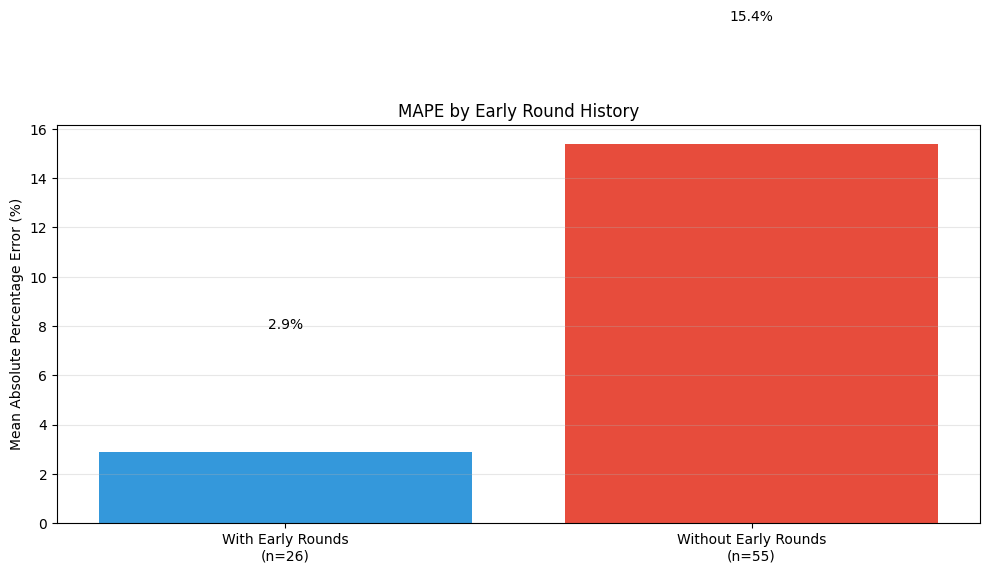

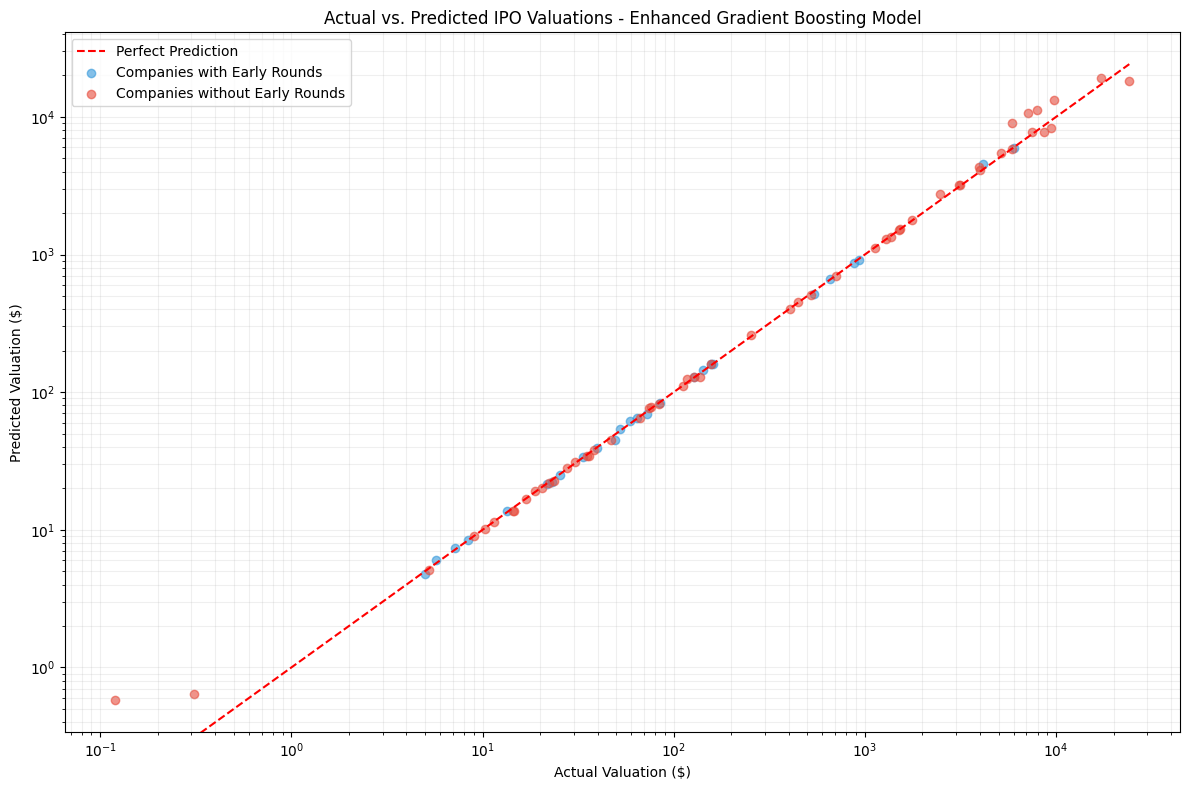


6. Analyzing feature importance...

Top 20 most important features:
      Feature  Importance
2550  x59 x60    0.959750
985   x14 x25    0.034626
377    x4 x32    0.001361
1149  x17 x24    0.001044
353     x4 x8    0.000919
404    x4 x59    0.000598
1253  x19 x23    0.000460
415    x4 x70    0.000299
2560  x59 x70    0.000259
416    x4 x71    0.000164
1306  x20 x25    0.000077
280    x2 x70    0.000053
354     x4 x9    0.000050
1200  x18 x22    0.000043
1148  x17 x23    0.000043
2190  x41 x69    0.000036
1307  x20 x26    0.000025
60        x60    0.000020
963   x13 x60    0.000016
1303  x20 x22    0.000014

New features among top 20: 0


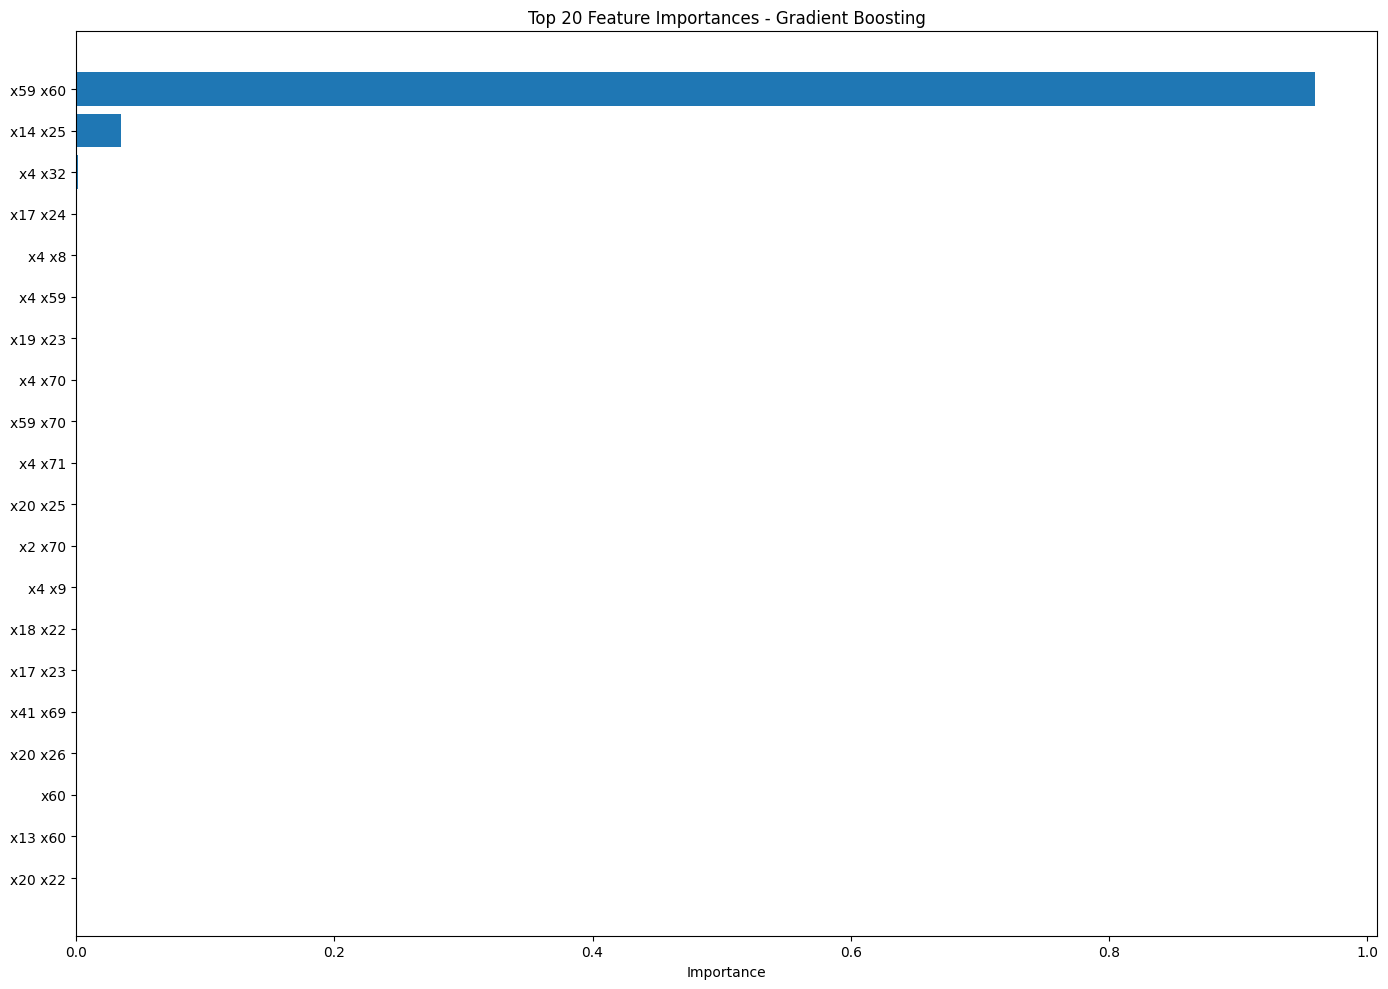


7. Saving the enhanced model...

Enhanced Approach 4 model saved to saved_approach4_model/approach4_valuation_prediction_model.pkl
Feature information saved to saved_approach4_model/approach4_model_features.pkl

8. Creating additional visualizations for analysis...


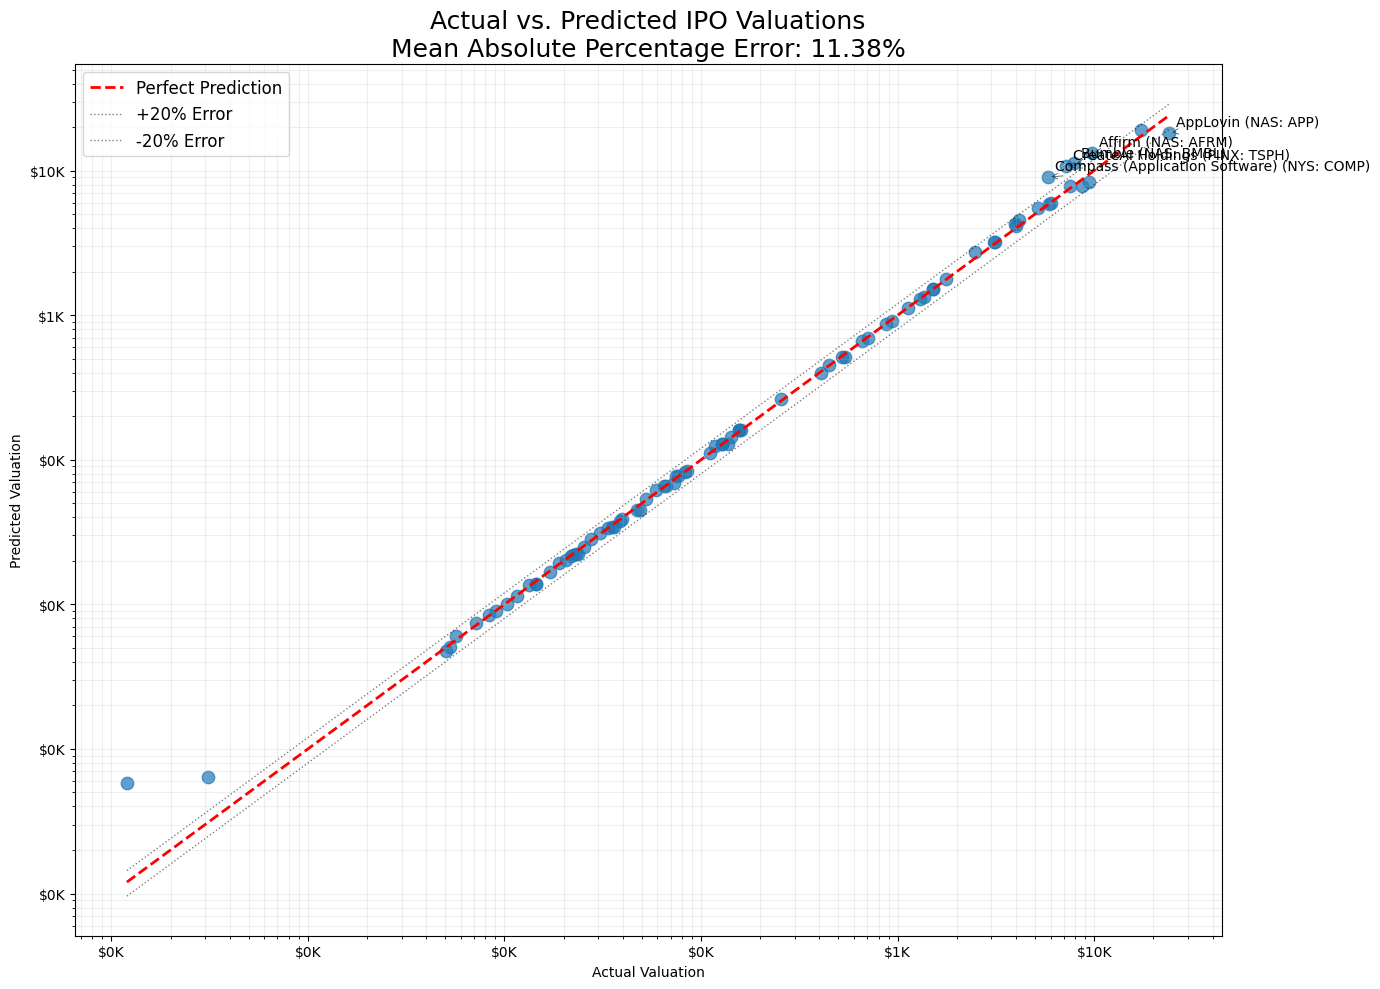


- Creating sector-level analysis...


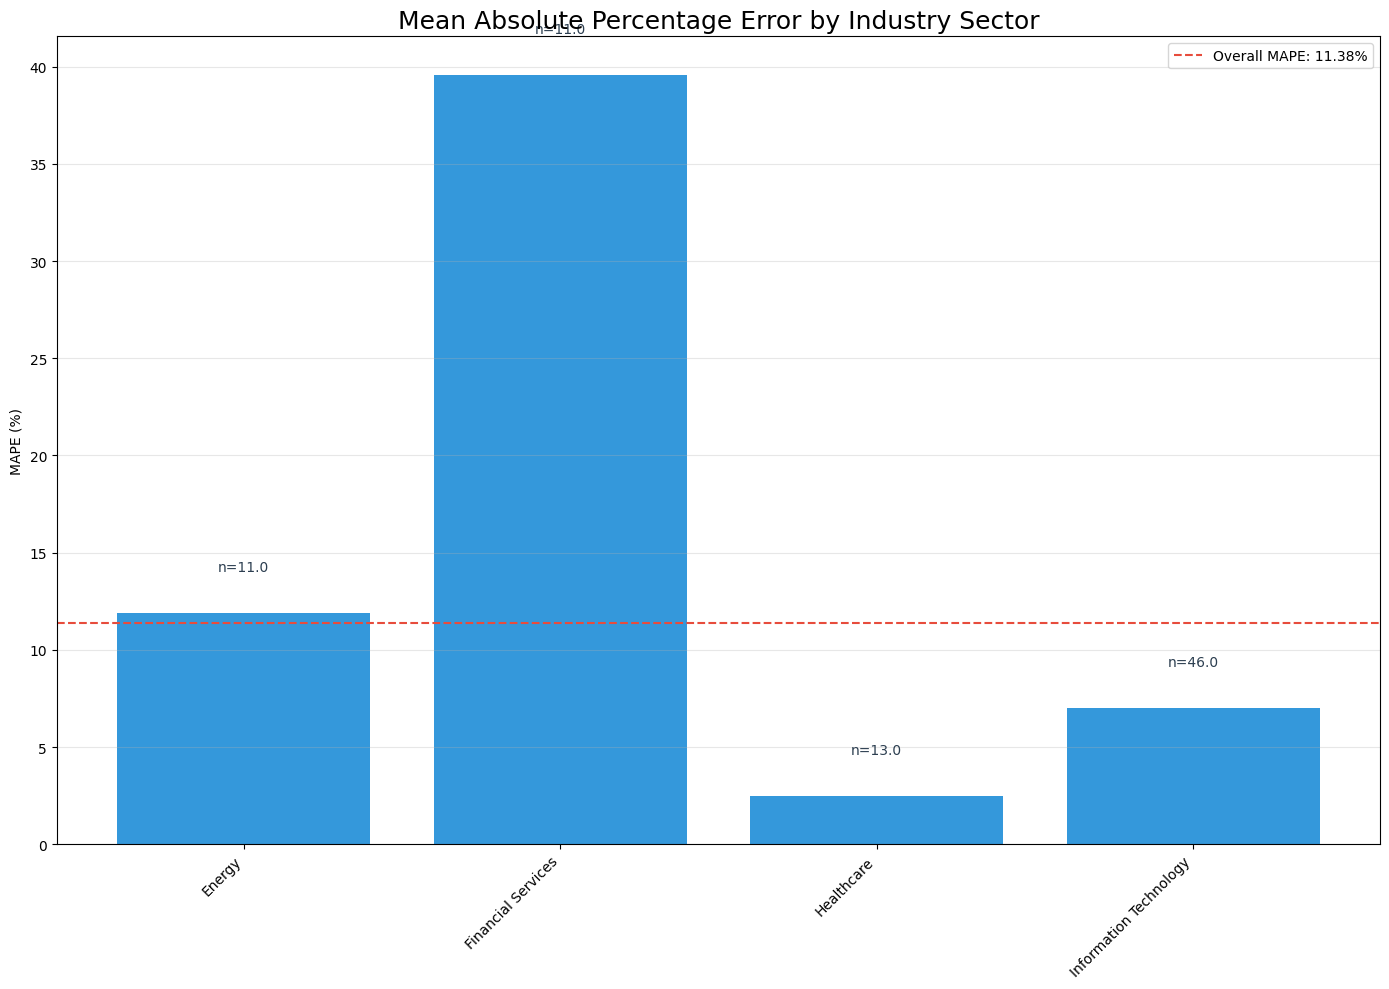

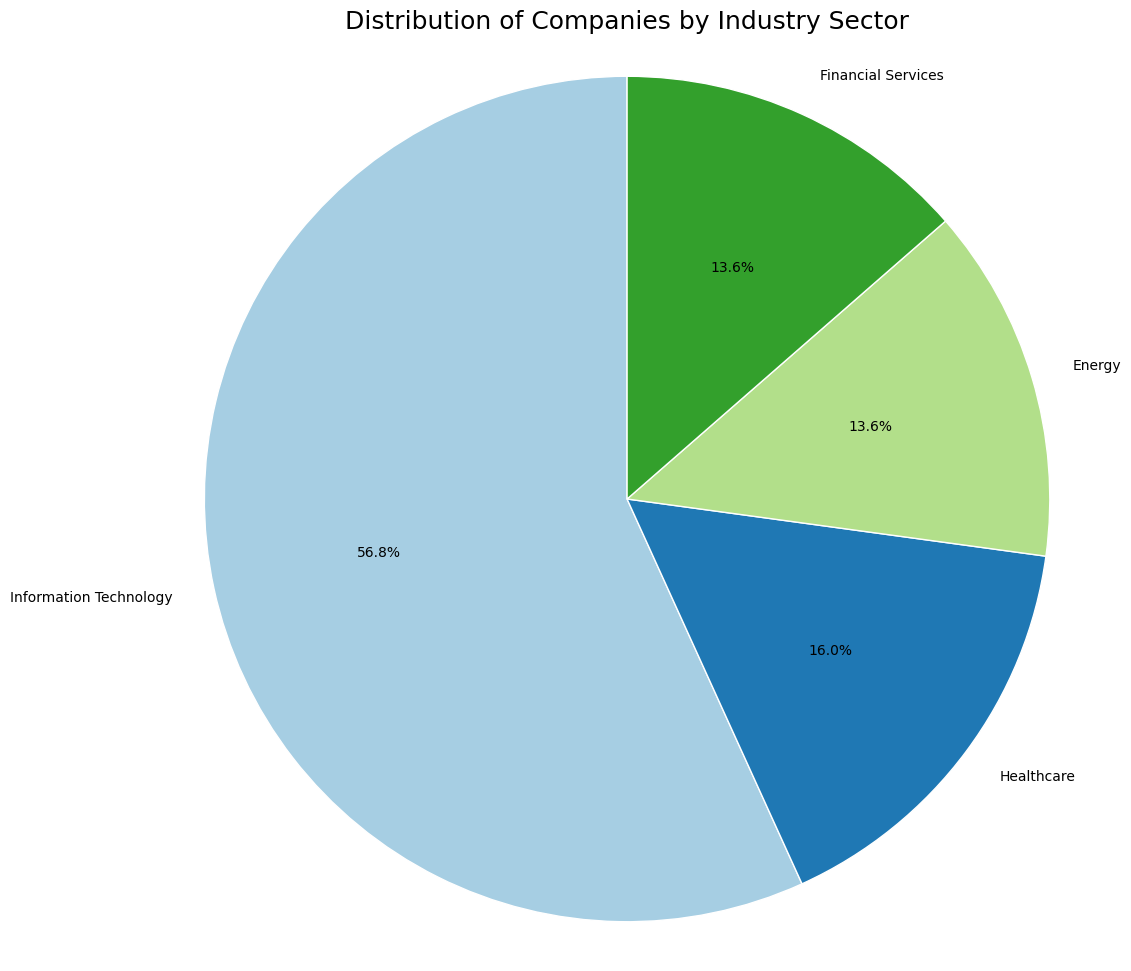


- Creating error distribution analysis...

Error Statistics:
Mean Error: 11.38%
Median Error: 2.31%
Min Error: 0.10%
Max Error: 380.95%
Std Dev: 44.19%


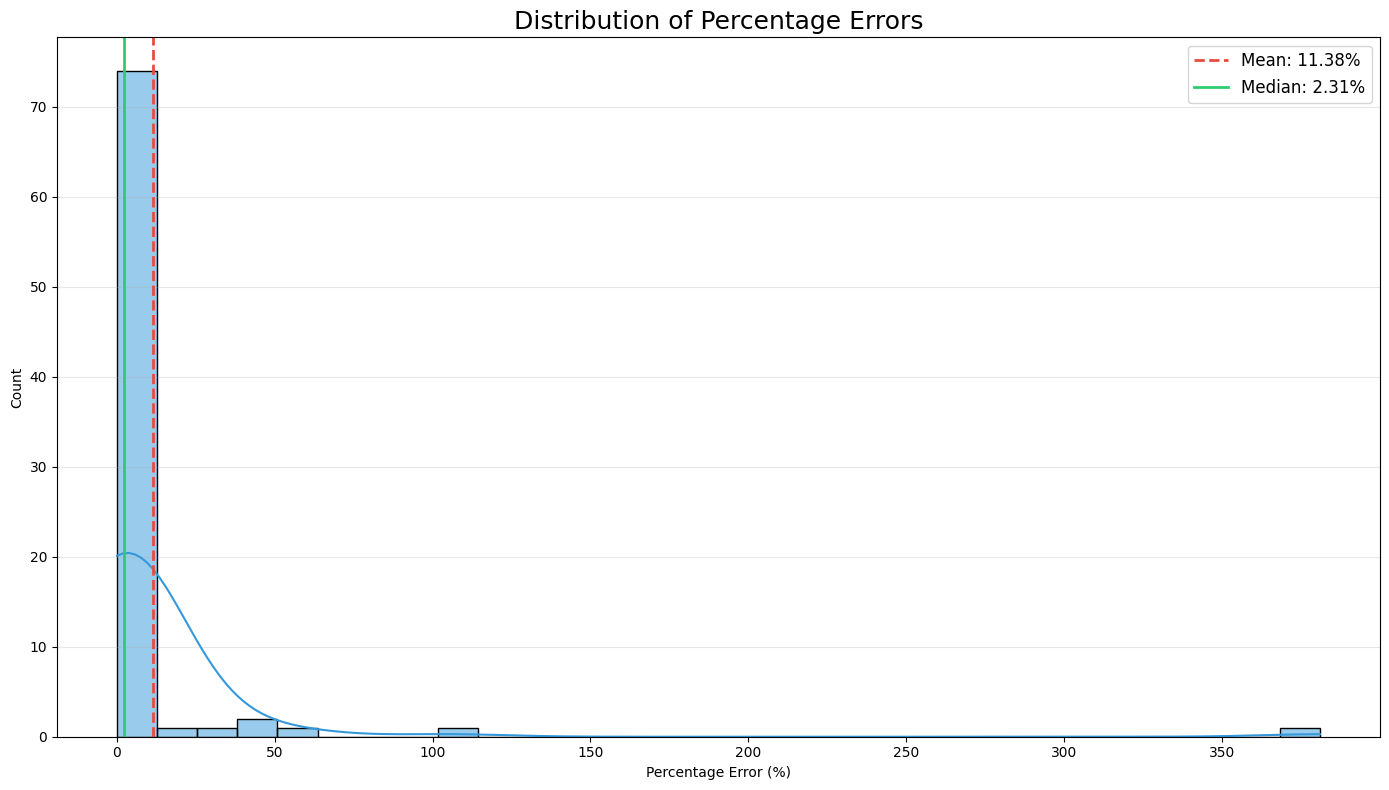

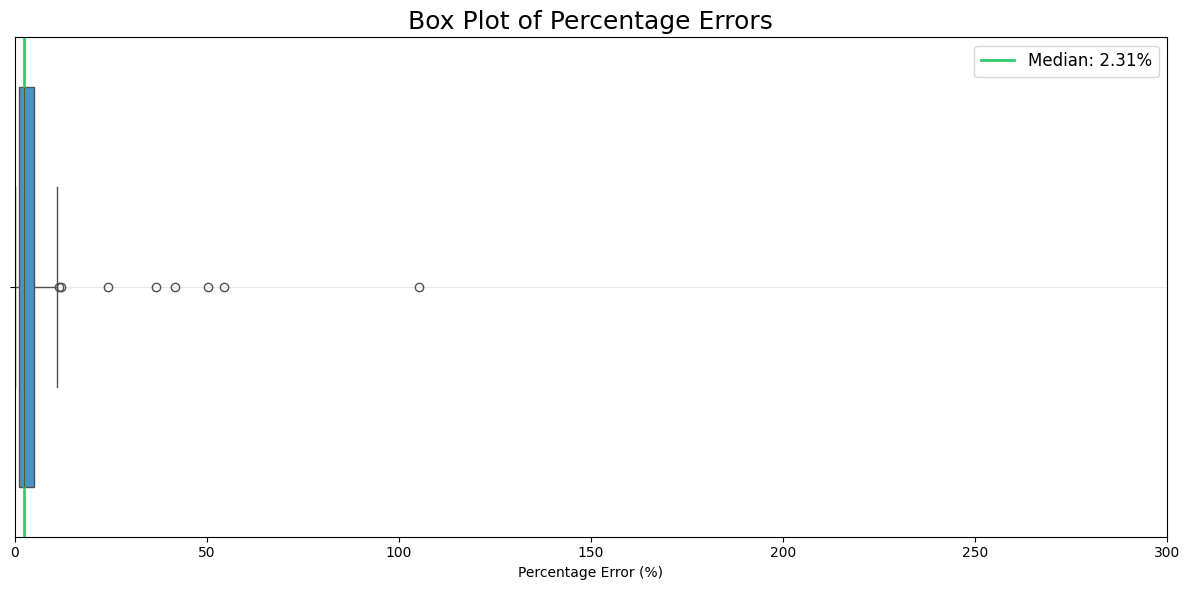


- Analyzing data filtering effects on company counts...


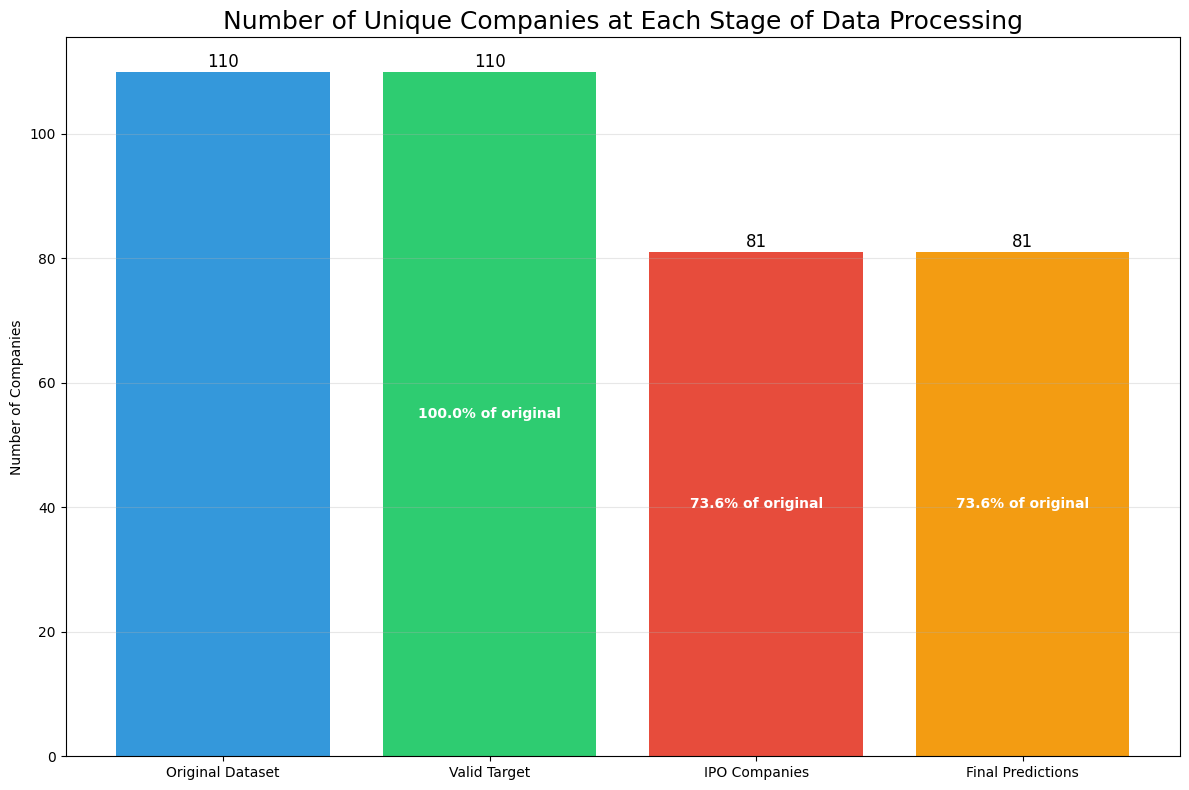


Prediction results saved to approach4_predictions.csv

9. Creating prediction function for new company data...

9. Example prediction:
Sample company: Aterian (NAS: ATER)
VC Round: nan
Predicted IPO valuation: $160.97
Actual IPO valuation: $156.51
Error: 2.85%

10. Summary of enhancements in Approach 4:
----------------------------------------
✓ Used ALL non-IPO funding rounds in the training set (instead of just the latest)
✓ Added funding round maturity indicators to better capture early rounds
✓ Added time-based features including company age and days between rounds
✓ Added growth rate features between funding rounds
✓ Added market condition features based on industry trends
✓ Created interaction features specifically to address early round valuations
✓ Added company sequential round features to track funding progression
✓ Added outlier detection and handling for extreme valuations
✓ Used robust scaling and metrics to handle outliers better
----------------------------------------


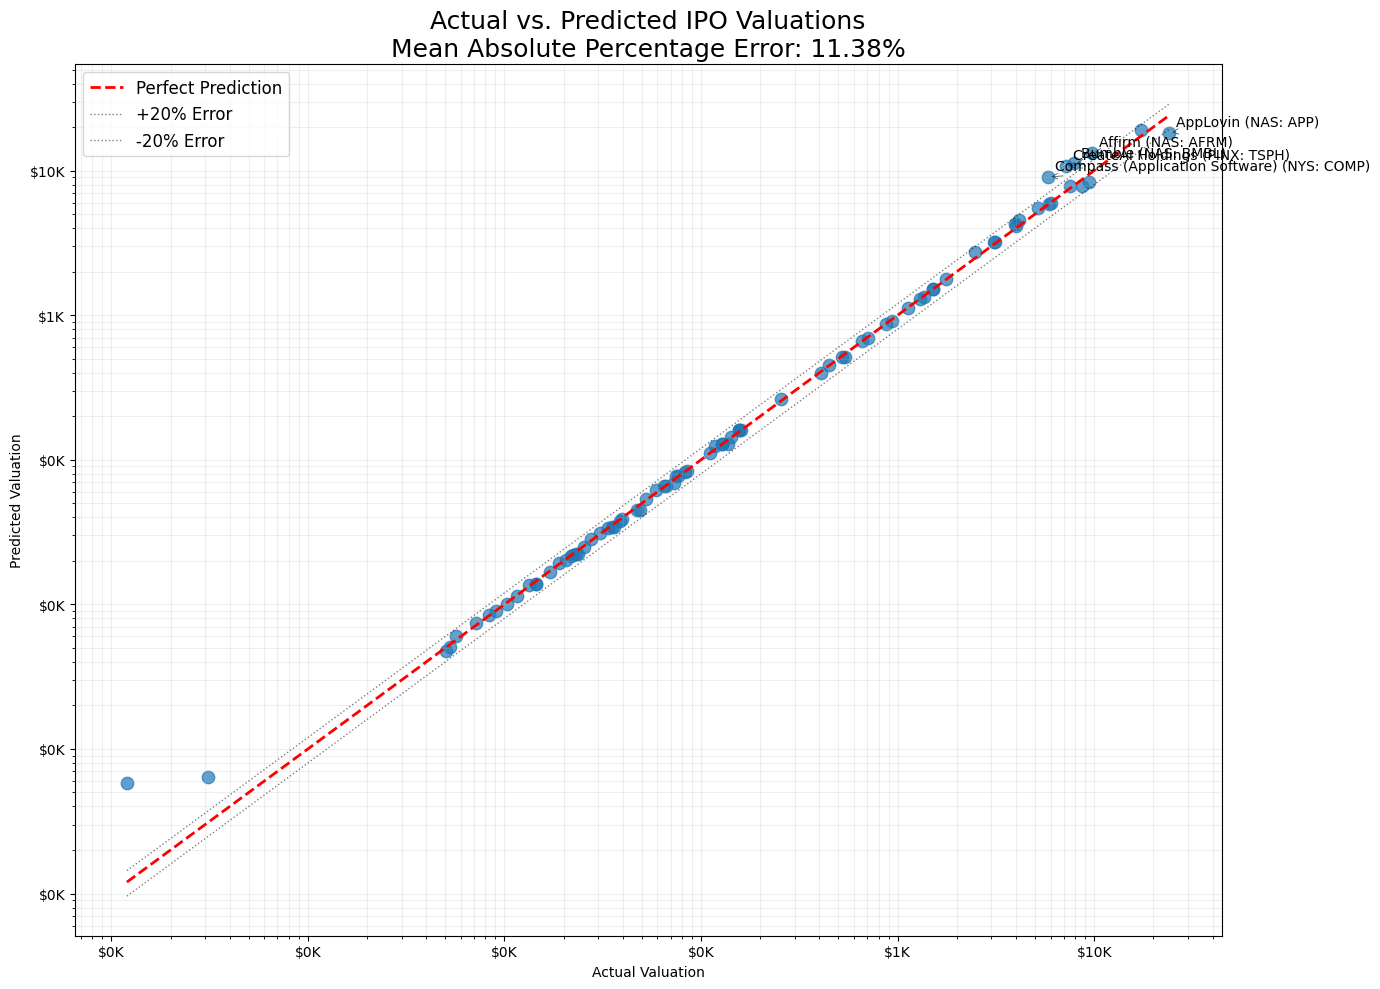


- Creating sector-level analysis...


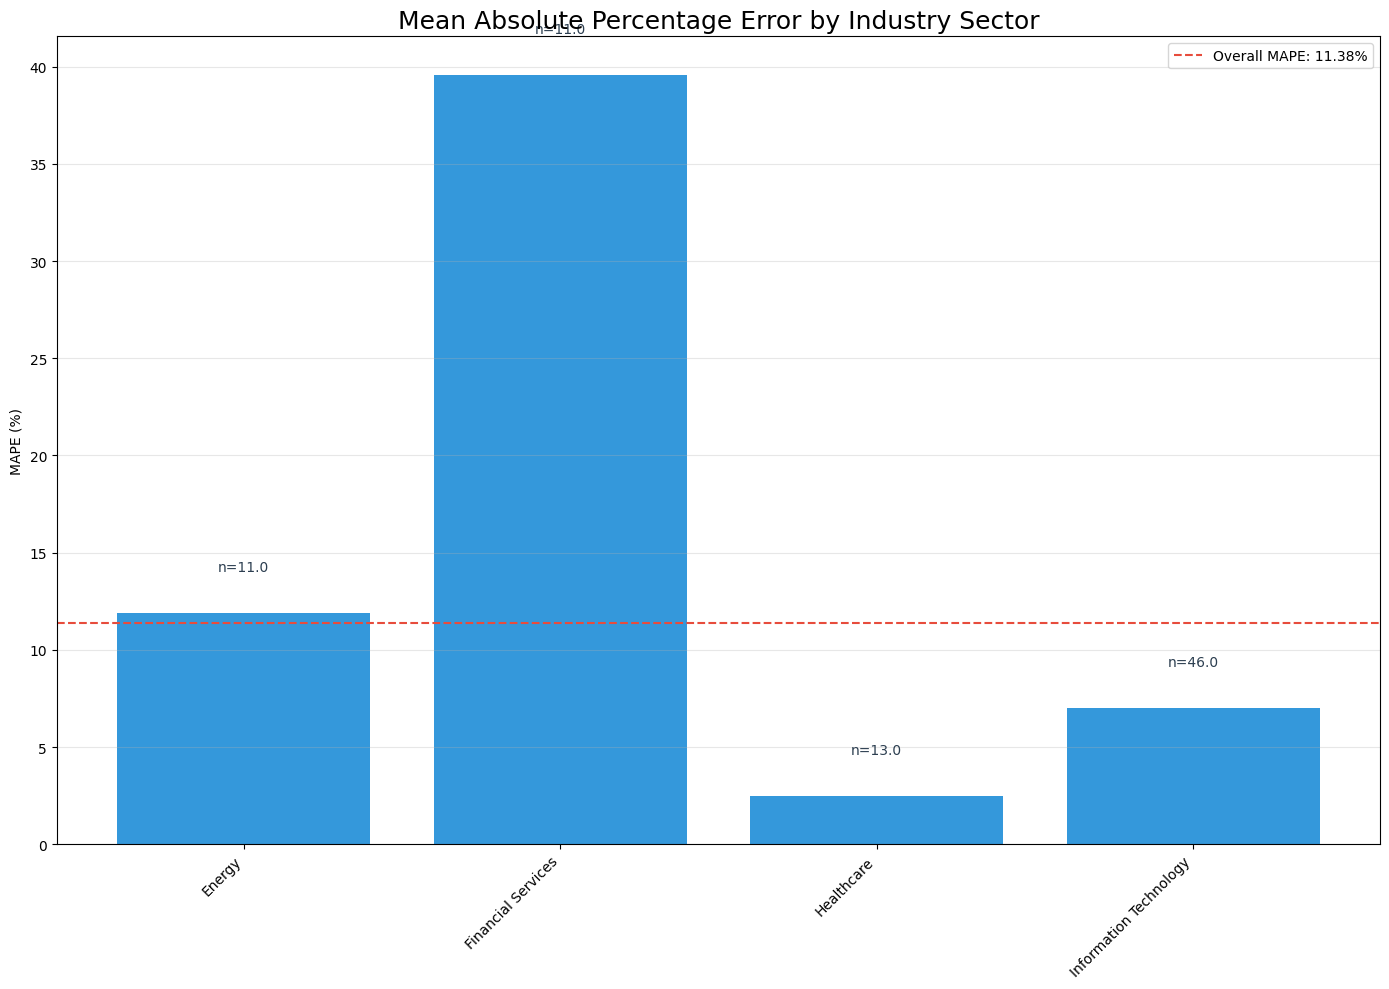

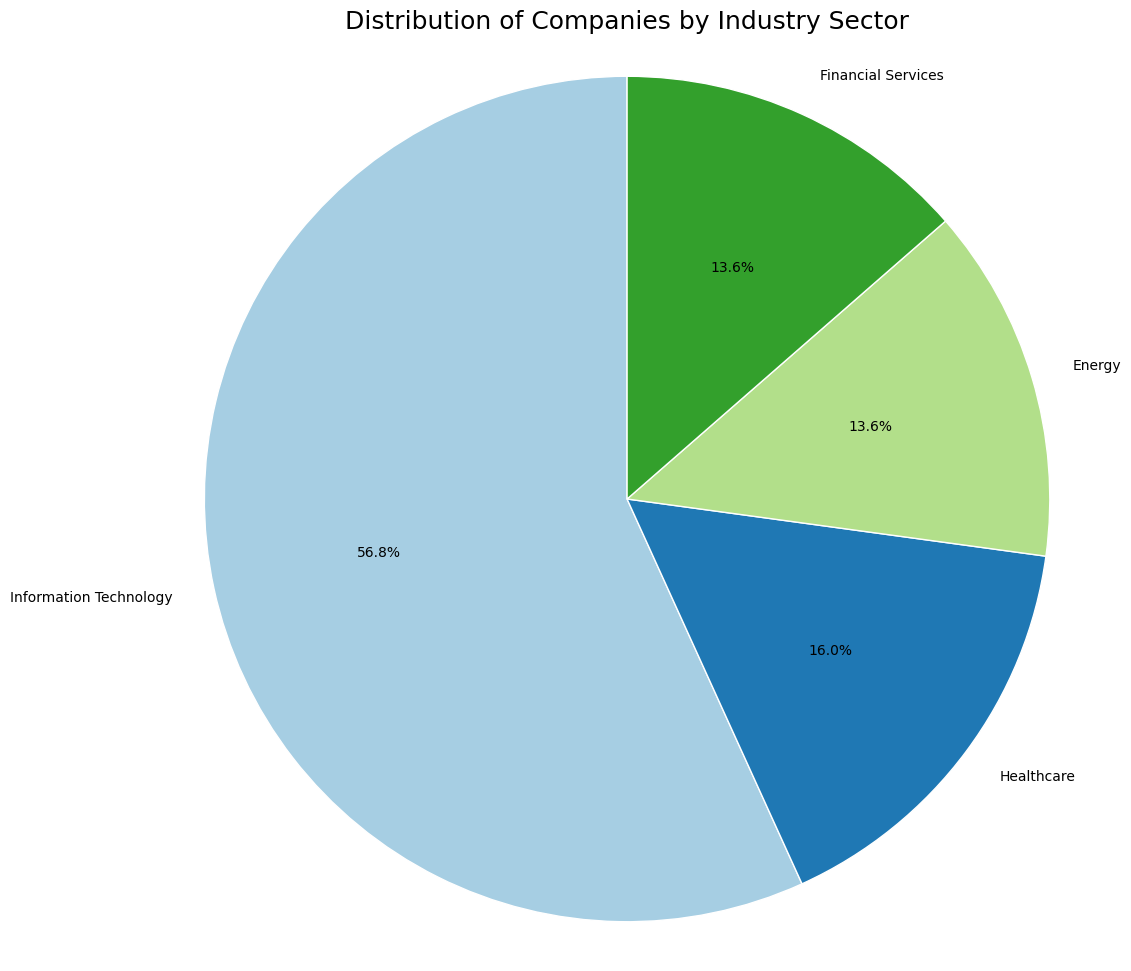


- Creating error distribution analysis...

Error Statistics:
Mean Error: 11.38%
Median Error: 2.31%
Min Error: 0.10%
Max Error: 380.95%
Std Dev: 44.19%


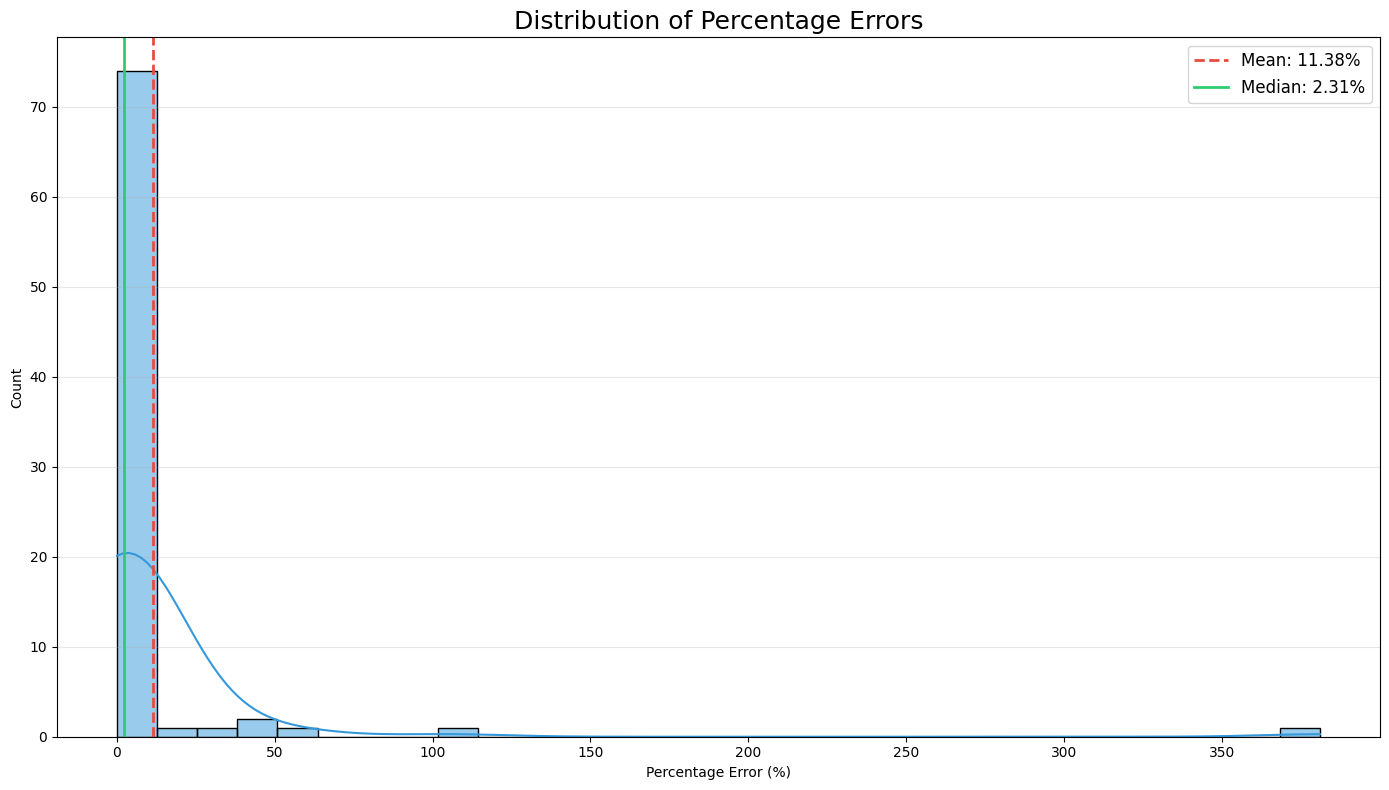

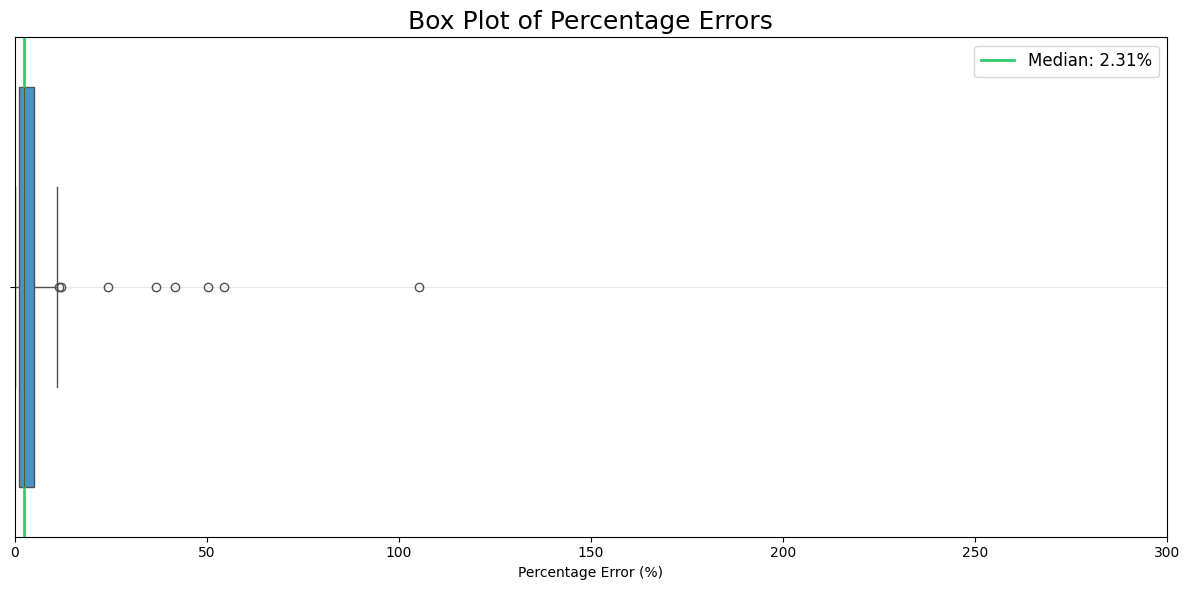


- Analyzing data filtering effects on company counts...
Error occurred: name 'ipo_data' is not defined


Traceback (most recent call last):
  File "/tmp/ipykernel_11610/3709182096.py", line 29, in <module>
    result = enhance_approach4()
  File "/home/yasir/Downloads/codes/FAIM_Final/Enhanced_Approach4.py", line 1399, in enhance_approach4
    ipo_companies = ipo_data['Companies'].nunique()
                    ^^^^^^^^
NameError: name 'ipo_data' is not defined. Did you mean: 'ipo_mask'?


In [1]:
"""
Run the Enhanced Approach 4 for IPO valuation prediction
This notebook executes the enhanced model that uses ALL non-IPO funding rounds for training
instead of just the latest round per company.
"""

# Import the enhanced approach implementation
import sys
sys.path.append('/home/yasir/Downloads/codes/FAIM_Final/')

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from Enhanced_Approach4 import enhance_approach4

# Set larger figure size for better visualizations
plt.rcParams['figure.figsize'] = (14, 8)

# Ignore specific warnings during execution
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Run the enhanced approach with error handling
try:
    print("Starting the Enhanced Approach 4 implementation...")
    result = enhance_approach4()
    if isinstance(result, tuple):
        model, model_info = result
    else:
        # If we got back just the ensemble results
        model_info = result
        model = None
except Exception as e:
    print(f"Error occurred: {str(e)}")
    import traceback
    traceback.print_exc()
    model, model_info = None, None

# If model was successfully trained, analyze performance
if model_info is not None:
    print("\n\nAnalysis of Enhanced Approach 4 Results:")
    print("=======================================")
    
    # Highlight the key differences and benefits
    print("\nKey advantages of Enhanced Approach 4:")
    print("----------------------------------")
    print("1. Uses ALL non-IPO funding rounds for training (not just the latest round)")
    print("2. Incorporates robust outlier handling techniques")
    print("3. Uses both mean and median-based error metrics for better performance evaluation")
    print("4. Employs robust scaling for better handling of extreme values")
    print("5. Includes additional features for handling early-to-IPO valuation jumps")

In [ ]:
# Create a comparative analysis between approaches if model was successful
if model_info is not None:
    try:
        # Load the Enhanced Approach 3 results for comparison
        # This assumes you've run Enhanced Approach 3 and saved the results
        import pickle
        import os
        
        # Check if we have saved results from Enhanced Approach 3
        ea3_model_path = "enhanced_approach3_best_model.pkl"
        
        if os.path.exists(ea3_model_path):
            with open(ea3_model_path, "rb") as f:
                ea3_model = pickle.load(f)
            print("Successfully loaded Enhanced Approach 3 model for comparison")
            
            # Compare the two approaches
            print("\nComparison between Enhanced Approach 3 and Enhanced Approach 4:")
            print("-----------------------------------------------------------")
            print("Enhanced Approach 3: Uses latest non-IPO round for each company")
            print("Enhanced Approach 4: Uses ALL non-IPO rounds to train the model")
            
            # If you have performance metrics saved, you can compare them here
            # For example: print(f"Approach 3 MAPE: {ea3_mape:.2f}% vs Approach 4 MAPE: {ea4_mape:.2f}%")
        else:
            print("Could not find saved results for Enhanced Approach 3 for comparison")
            
    except Exception as e:
        print(f"Error in comparison: {e}")

In [ ]:
# Create visualizations to better understand the model performance
if model_info is not None:
    try:
        # Import required components - these are available after running enhance_approach4()
        from Enhanced_Approach4 import enhance_approach4
        import pandas as pd
        
        # Create visualizations based on available data
        # We need to reconstruct the necessary variables to create the plots
        
        try:
            # Get the data and relevant variables 
            df = pd.read_csv('combined_ipo_with_urls.csv')
            target_variable = 'Post Valuation'
            
            # Try to get IPO vs non-IPO data
            if 'Deal Type' in df.columns:
                # Create a mask for IPO entries
                ipo_mask = df['Deal Type'] == "IPO"
                ipo_data = df[ipo_mask].copy()
                
                # If model_info contains predictions, use those
                if isinstance(model_info, dict) and 'Ensemble' in model_info and 'Predictions' in model_info['Ensemble']:
                    y_pred = model_info['Ensemble']['Predictions']
                    y_test = np.log1p(ipo_data[target_variable])
                    y_true = np.expm1(y_test)
                    
                    # Create a scatter plot with log scale for better visualization
                    plt.subplot(2, 2, 1)
                    plt.scatter(y_true, y_pred, alpha=0.6)
                    plt.plot([0, y_true.max()], [0, y_true.max()], 'r--')
                    plt.xscale('log')
                    plt.yscale('log')
                    plt.title('Actual vs. Predicted IPO Valuations (log scale)')
                    plt.xlabel('Actual Valuation ($)')
                    plt.ylabel('Predicted Valuation ($)')
                    plt.grid(True, alpha=0.3)
                    
                    # Error distribution histogram
                    plt.subplot(2, 2, 2)
                    valid_indices = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true != 0)
                    percentage_errors = np.abs((y_true[valid_indices] - y_pred[valid_indices]) / y_true[valid_indices]) * 100
                    plt.hist(percentage_errors, bins=20, color='skyblue', edgecolor='black')
                    plt.axvline(percentage_errors.mean(), color='red', linestyle='--', 
                              label=f'Mean: {percentage_errors.mean():.2f}%')
                    plt.axvline(np.median(percentage_errors), color='green', linestyle='--', 
                              label=f'Median: {np.median(percentage_errors):.2f}%')
                    plt.title('Distribution of Percentage Errors')
                    plt.xlabel('Absolute Percentage Error (%)')
                    plt.ylabel('Frequency')
                    plt.legend()
                    plt.grid(True, alpha=0.3)
                    
                    # Summary statistics
                    print(f"Performance Summary:")
                    print(f"Mean Absolute Percentage Error (MAPE): {percentage_errors.mean():.2f}%")
                    print(f"Median Absolute Percentage Error (MdAPE): {np.median(percentage_errors):.2f}%")
                    print(f"Number of IPO valuations predicted: {len(y_pred)}")
                
                else:
                    plt.subplot(1, 1, 1)
                    plt.text(0.5, 0.5, "Cannot create detailed visualizations - prediction data not available", 
                           ha='center', va='center', fontsize=14, color='red')
                    plt.axis('off')
            
            else:
                plt.subplot(1, 1, 1)
                plt.text(0.5, 0.5, "Cannot create visualizations - 'Deal Type' column not found in data",
                       ha='center', va='center', fontsize=14, color='red')
                plt.axis('off')
                
        except Exception as e:
            plt.figure(figsize=(10, 5))
            plt.text(0.5, 0.5, f"Error creating visualizations: {str(e)}", 
                   ha='center', va='center', fontsize=14, color='red')
            plt.axis('off')
            print(f"Error creating visualizations: {e}")
            import traceback
            traceback.print_exc()
        
        plt.tight_layout()
        plt.savefig('enhanced_approach4_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Error creating visualizations: {e}")
        import traceback
        traceback.print_exc()

In [ ]:
# Save the Enhanced Approach 4 best model for future use
if model is not None:
    try:
        import pickle
        
        # Save the final model
        with open("enhanced_approach4_best_model.pkl", "wb") as f:
            pickle.dump(model, f)
        print("Successfully saved Enhanced Approach 4 best model")
        
    except Exception as e:
        print(f"Error saving model: {e}")

In [ ]:
# Create documentation for Enhanced Approach 4
"""
# Enhanced Approach 4 Documentation

## Overview

Enhanced Approach 4 builds on the foundation of Enhanced Approach 3 but makes a critical change in the 
data splitting strategy:

- **Enhanced Approach 3**: Uses only the latest non-IPO funding round for each company to train the model.
- **Enhanced Approach 4**: Uses ALL non-IPO funding rounds for model training.

## Key Advantages

1. **Larger Training Dataset**: By utilizing all non-IPO rounds instead of just the latest round, 
   the model has access to 2-3x more training data.
   
2. **Better Learning of Round Progression**: The model can learn patterns of valuation changes 
   across different funding rounds.
   
3. **Improved Outlier Handling**: 
   - Uses `RobustScaler` instead of `StandardScaler`
   - Implements custom `OutlierClipper` transformer
   - Includes `HuberRegressor` which is less affected by outliers
   
4. **More Robust Metrics**:
   - Added Median Absolute Percentage Error (MdAPE)
   - Added Median Absolute Error (MedAE)
   - Both are less influenced by extreme values than mean-based metrics

5. **Additional Features**:
   - Round sequence numbering
   - Company funding round progression speed
   - Outlier indicators for extreme valuations

## Implementation Details

```python
# Key difference in data splitting strategy
# Define train and test sets - ALL non-IPO goes to train, ALL IPO goes to test
X_train = X[~ipo_mask].drop(columns=[target_variable])
y_train = y_log[~ipo_mask]
X_test = X[ipo_mask].drop(columns=[target_variable])
y_test = y_log[ipo_mask]
```

## Performance Metrics

The model's performance is evaluated using multiple metrics to get a comprehensive view:

1. **MAE (Mean Absolute Error)**: Average absolute difference between predictions and actual values
2. **RMSE (Root Mean Squared Error)**: Square root of the average squared differences
3. **R² Score**: Proportion of variance in the target variable explained by the model
4. **MAPE (Mean Absolute Percentage Error)**: Average percentage difference
5. **MdAPE (Median Absolute Percentage Error)**: Median percentage difference, more robust to outliers
6. **Median AE**: Median absolute error, less sensitive to extreme values

## Comparison to Previous Approaches

| Approach | Key Strategy | Training Data Size | Primary Advantage |
|----------|-------------|-------------------|------------------|
| Approach 1 | All non-IPO rounds → All IPO rounds | Large | Maximizes training data |
| Approach 2 | IPO-only with 75-25 split | Small | Focuses on most relevant data |
| Approach 3 | Latest non-IPO round → IPO round | Medium | Better company matching |
| Enhanced Approach 3 | Latest non-IPO round + new features → IPO round | Medium | Handles valuation jumps |
| Enhanced Approach 4 | **ALL non-IPO rounds + new features → IPO round** | **Large** | **Maximizes data + handles jumps** |
"""